# PIK3CA: Effects of Mutation on IRS2

<b> Standard imports for playing with and plotting data frames. </b>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

<b> Import CPTAC data

In [2]:
import CPTAC

Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [3]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

# PI3KCA mutation and IRS2 proteome abundance

### Perform a t-test with mutated and non-mutated protein levels

In [4]:
protList = ['IRS2']
pcutoff = 0.05 / len(protList)
gene = 'PIK3CA'

sigResults = [];
for protein in protList: 
    if protein in proteomics.columns:
        cross = CPTAC.merge_mutations(proteomics, protein, gene)
        cross = cross[["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[cross["Mutation"] != "Wildtype"]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if(ttest[1] <= pcutoff):
            sigResults.append(protein)
            print("Test for " + protein + ": ")
            print(ttest) 

Test for IRS2: 
Ttest_indResult(statistic=-4.305242968682799, pvalue=3.4083077260524325e-05)


 ### We can now plot the data 

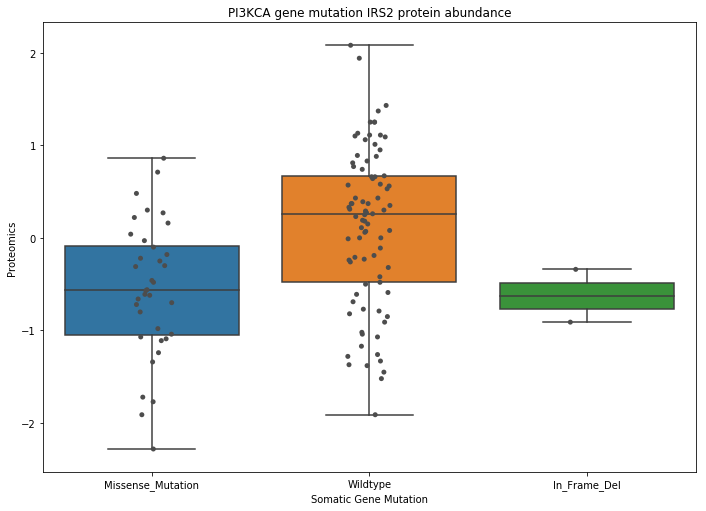

In [5]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y='IRS2', ax = ax)
somatic_boxplot.set_title("PI3KCA gene mutation IRS2 protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y='IRS2',jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

# PI3KCA mutation and IRS2 phosphoproteome abundance

In [6]:
phosProtList = ['IRS2']
sigResults = [];
pcutoff = 0.05/len(phosProtList)
print(pcutoff)


for protein in phosProtList: 
        cross = CPTAC.compare_mutations(phos, protein, gene)
        #print(cross.head())
        for loc in cross.columns:
            #print(loc)
            cross_site = cross[["Mutation", loc]].dropna(axis=0)
            #print(cross_site)
            mutated = cross_site.loc[cross_site["Mutation"] != "Wildtype"]
            wt = cross_site.loc[cross_site["Mutation"] == "Wildtype"]
            ttest = scipy.stats.ttest_ind(mutated[loc], wt[loc])
            if(ttest[1] <= pcutoff):
                sigResults.append(loc)
                print("Test for " + loc + ": ")
                print(ttest) 

0.05


AttributeError: module 'CPTAC' has no attribute 'compare_mutations'

## Graph the data 